1. [Dataset Description](README.md)
2.  <a href="#asses">Data Assessing</a>
3.  <a href="#clean">Data Cleaning</a>
    - <a href="#rename">Renaming Columns</a>
    - <a href="#dtype">Renaming Columns</a>
    - <a href="#insert">Renaming Columns</a>
4.  <a href="#explore">Data Exploring</a>
# Dataset Description:
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.* ***Patientid :*** The identification number of the patient.
* ***AppointmentID:*** The identification number of the appointment _"Key Identifier"_.
* ***Gender:*** _"M"_ for Male, and _"F"_ for Female.
* ***ScheduleDay:*** Tells us on what day the patient set up their appointment.
* ***Age:*** The patient's age.
* ***Neighbourhood:*** Indicates the location of the hospital
* ***Scholaeship:*** Indicates whether or not the patient is enro in Brasilian welfare program [Bolsa Família](https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&source=editors&ust=1724087817860577&usg=AOvVaw2Q_qcF1o_XPTswzKDAbl1Q) .Where, _Enrolled = 1_ and _Not Enroled = 0_.
* ***Hipertension (HTN):*** Patients with high blood pressure. Where, _True = 1_ and _False = 0_.
* ***Diabetes (DM):*** Patients with high blood sugar levels. Where, _True = 1_ and _False = 0_.
* ***Alcoholism (AUD):*** Alcohol use disorder. Where, _True = 1_ and _False = 0_.
* ***Handicap (HCP):*** an illness, injury, or condition that makes it difficult for someone to do some things that other people do. Where, _True = [1,2,3,4]_ and _False = 0_.
* ***SMS_received:*** 1 or more messages sent to the patient. Where, _True = 1_ and _False = 0_.
* ***No-show:*** _"No"_ if the patient showed up to their appointment,and _"Yes"_ if they did not show up.



In [518]:
# Importing Liberaries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='asses'></a>
## 1- Data Assessing:

In [521]:
# Exploring data characteristics of the dataset:
df= pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [525]:
print('The dataset has a shape of:',df.shape)

The dataset has a shape of: (110527, 14)


In [527]:
if df.isna().sum().sum()== 0:
    print ('No NULL values in this dataset')
else:
    print('Total number of Null Values is: ',df.isna().sum().sum())

No NULL values in this dataset


In [529]:
if df.duplicated().sum()== 0:
    print ('No DUPLICATED values in this dataset')
else:
    print('Total number of Duplicated Values is: ',df.duplicated().sum())

No DUPLICATED values in this dataset


In [531]:
print('The number of UNIQUE values in this dataset:\n\n',df.nunique())

The number of UNIQUE values in this dataset:

 PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


In [533]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [535]:
print('"Gender" Categories:        ',df.Gender.unique())
print('\n"Scolarship" Categories:    ', df.Scholarship.unique())
print('\n"Hipertension" Category:    ', df.Hipertension.unique())
print('\n"Diabetes" Category:        ', df.Diabetes.unique())
print('\n"Alcoholism" Category:      ', df.Alcoholism.unique())
print('\n"Handcap" Category:         ', df.Handcap.unique())
print('\n"SMS_received" Category:    ', df['SMS_received'].unique())
print('\n"No-show" Category:         ', df['No-show'].unique())

"Gender" Categories:         ['F' 'M']

"Scolarship" Categories:     [0 1]

"Hipertension" Category:     [1 0]

"Diabetes" Category:         [0 1]

"Alcoholism" Category:       [0 1]

"Handcap" Category:          [0 1 2 3 4]

"SMS_received" Category:     [0 1]

"No-show" Category:          ['No' 'Yes']


In [537]:
#The describtive statistics for the whole dataset:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='clean'></a>
## 2 - Data Cleaning:

<a id='rename'></a>
### a) Renaming Column labels:
   
In order to investigate easily the columns  label nees to be changedas follows:
   * _PatientId_          to     ***patient_id***
   * _AppointmentID_      to     ***appoint_id***
   * _Gender_             to     ***gender***
   * _ScheduledDay_       to     ***sched_day***
   * _AppointmentDay_     to     ***appoint_day***
   * _Age_                to     ***age***
   * _Neighbourhood_      to     ***neighbourhood***
   * _Scholarship_        to     ***scholarship***
   * _Hipertension_       to     ***htn***
   * _Diabetes_           to     ***dm***
   * _Alcoholism_         to     ***aud***
   * _Handcap_            to     ***hcp***
   * _SMS_received_       to     ***sms_received***
   * _No-show_            to     ***no_show***


In [541]:
# Renaming the dataset columns:
df = df.rename(columns = {"PatientId":"patient_id", "AppointmentID":"appoint_id", 'Gender':"gender","ScheduledDay":"sched_day",
                           "AppointmentDay":"appoint_day","Age":"age", "Neighbourhood":"neighbourhood", "Scholarship":"scholarship",
                           "Hipertension":"htn", "Diabetes":"dm", "Alcoholism":"aud","Handcap":"hcp", "SMS_received":"sms_received","No-show":"no_show"})
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='dtype'></a>
### b) Changing the data types of:
- _patient_id_ to ***integer***
- _sched_day_ & _appoint_day_ to ***date format***

In [544]:
# Changing the data types:
df['patient_id'] = df['patient_id'].astype('int64')
df['sched_day'] = pd.to_datetime(df['sched_day']).dt.date
df['appoint_day'] = pd.to_datetime(df['appoint_day']).dt.date
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   patient_id     110527 non-null  int64 
 1   appoint_id     110527 non-null  int64 
 2   gender         110527 non-null  object
 3   sched_day      110527 non-null  object
 4   appoint_day    110527 non-null  object
 5   age            110527 non-null  int64 
 6   neighbourhood  110527 non-null  object
 7   scholarship    110527 non-null  int64 
 8   htn            110527 non-null  int64 
 9   dm             110527 non-null  int64 
 10  aud            110527 non-null  int64 
 11  hcp            110527 non-null  int64 
 12  sms_received   110527 non-null  int64 
 13  no_show        110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


<a id='insert'></a>
### c) Inserting New Columns in the dataset:
- ***date_diff:*** To measure the difference in days between  _The Schedule Date_ and _The Appointment Date_.
- ***age_stages:*** groupping the _age_ column according to the different stages of human life, as follows:
    - **child:** Ages from _0_ to _12_
    - **teenage:** Ages greater than _12_ to _21_
    - **adult:** Ages greater than _21_ to _40_
    - **middle_age:** Ages greater than _40_ to _65_
    - **elderly:** Ages greater than _65_
  


In [549]:
# Inserting the "date_diff" column:
df['date_diff']= (df['appoint_day']- df['sched_day']).dt.days
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show,date_diff
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0


In [551]:
# relocating the "date_diff" column to be in the 5th column:
df.insert(5,'date_diff',df.pop('date_diff'))
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [553]:
# Inserting the "age_stages" column:
df['age_stages']= ['child' if x <= 12
                   else 'teenage' if 12 < x <= 21
                   else 'adult' if 21 < x <= 40
                   else 'middle_aged' if 40 < x <= 65
                   else 'elderly' for x in df['age']]
df.head()

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show,age_stages
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No,middle_aged
1,558997776694438,5642503,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No,middle_aged
2,4262962299951,5642549,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,No,middle_aged
3,867951213174,5642828,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,child
4,8841186448183,5642494,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No,middle_aged


In [555]:
# relocating the "age_stages" column to be in the 6th column:
df.insert(6,'age_stages',df.pop('age_stages'))
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,age_stages,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,middle_aged,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='insert'></a>
### d) Exploring the charcteristics of _"age"_ and _"date_diff"_:
1. ***age:*** Investigating the cause of negative values that appeared in the minimum value during descriptive statistics.
2. ***date_diff:*** Applying descriptive statistics for further investigation.

   _Notes:_
   - Since the data type for age is an integer, ages less than one year ***(in months)*** are recorded as **0** years.
   - The **sched_day** should occur before the **appoint_day** (_i.e.,_ appoint_day > sched_day)

In [558]:
# Descriptive statistics for age:
df.age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [560]:
df.query("age < 0")

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,age_stages,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,0,child,-1,ROMÃO,0,0,0,0,0,0,No


In [562]:
# replacing the value of -1 years with 1:
df.age= np.where(df.age< 0,1,df.age)

In [564]:
df.age.describe()

count    110527.000000
mean         37.088892
std          23.110176
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [566]:
df.query("age >= 100")

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,age_stages,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
58014,976294799775439,5651757,F,2016-05-03,2016-05-03,0,elderly,102,CONQUISTA,0,0,0,0,0,0,No
63912,31963211613981,5700278,F,2016-05-16,2016-05-19,3,elderly,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,31963211613981,5700279,F,2016-05-16,2016-05-19,3,elderly,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,31963211613981,5562812,F,2016-04-08,2016-05-16,38,elderly,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,31963211613981,5744037,F,2016-05-30,2016-05-30,0,elderly,115,ANDORINHAS,0,0,0,0,1,0,No
79270,9739429797896,5747809,M,2016-05-30,2016-05-31,1,elderly,100,TABUAZEIRO,0,0,0,0,1,0,No
79272,9739429797896,5747808,M,2016-05-30,2016-05-31,1,elderly,100,TABUAZEIRO,0,0,0,0,1,0,No
90372,234283596548,5751563,F,2016-05-31,2016-06-02,2,elderly,102,MARIA ORTIZ,0,0,0,0,0,0,No
92084,55783129426615,5670914,F,2016-05-06,2016-06-03,28,elderly,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No
97666,748234579244724,5717451,F,2016-05-19,2016-06-03,15,elderly,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [568]:
# Exploring date_diff column:
df.date_diff.describe().reset_index().rename(columns={'index':'stat','date_diff': 'amount'}).round()

,stat,amount
0,count,110527.0
1,mean,10.0
2,std,15.0
3,min,-6.0
4,25%,0.0
5,50%,4.0
6,75%,15.0
7,max,179.0


In [570]:
# Determining the dates where the schedule dates were after the appointment dates:
df.query('date_diff<0').iloc[:,3:6]

,sched_day,appoint_day,date_diff
27033,2016-05-10,2016-05-09,-1
55226,2016-05-18,2016-05-17,-1
64175,2016-05-05,2016-05-04,-1
71533,2016-05-11,2016-05-05,-6
72362,2016-05-04,2016-05-03,-1


In [572]:
# Adjusting those appointment dates to be the same as the schedule dates:
df['appoint_day']=np.where(df['appoint_day']<df['sched_day'],df['sched_day'],df['appoint_day'])
df['date_diff']= (df['appoint_day']- df['sched_day']).dt.days
time_stats=df.date_diff.describe().reset_index().rename(columns={'index':'stat','date_diff': 'amount'}).round()
time_stats

,stat,amount
0,count,110527.0
1,mean,10.0
2,std,15.0
3,min,0.0
4,25%,0.0
5,50%,4.0
6,75%,15.0
7,max,179.0


In [574]:
# Exploring the charcteristics of the amended dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   patient_id     110527 non-null  int64 
 1   appoint_id     110527 non-null  int64 
 2   gender         110527 non-null  object
 3   sched_day      110527 non-null  object
 4   appoint_day    110527 non-null  object
 5   date_diff      110527 non-null  int64 
 6   age_stages     110527 non-null  object
 7   age            110527 non-null  int64 
 8   neighbourhood  110527 non-null  object
 9   scholarship    110527 non-null  int64 
 10  htn            110527 non-null  int64 
 11  dm             110527 non-null  int64 
 12  aud            110527 non-null  int64 
 13  hcp            110527 non-null  int64 
 14  sms_received   110527 non-null  int64 
 15  no_show        110527 non-null  object
dtypes: int64(10), object(6)
memory usage: 13.5+ MB


<a id='explore'></a>
## 2 - Data Exploring:

In [578]:
# Exploring patient_id Column:
patient_frequency=df.patient_id.value_counts().reset_index()
patient_frequency.rename(columns={'index':'patient_id','patient_id':'frequency'})

,patient_id,frequency
0,822145925426128,88
1,99637671331,84
2,26886125921145,70
3,33534783483176,65
4,6264198675331,62
...,...,...
62294,862263621811,1
62295,9267587227475,1
62296,5764355598913,1
62297,5712491287569,1


In [580]:
# Exploring the most frequent patient:
print(f'The most frequent patient_id is {patient_frequency.iloc[0,0]} with a number of {patient_frequency.iloc[0,1]} appointments.\n\n')
df.query('patient_id== 822145925426128').head(1).iloc[:,[0,2,6,7,8,9,10,11,12,13]].style.hide()

The most frequent patient_id is 822145925426128 with a number of 88 appointments.




patient_id,gender,age_stages,age,neighbourhood,scholarship,htn,dm,aud,hcp
822145925426128,M,adult,38,REDENÇÃO,0,0,0,0,0


In [582]:
print(f'For patient No. {patient_frequency.iloc[0,0]}:\n\n1- Counting the number of frequency of the difference between schedule date & appointment date:\n ')
df.query('patient_id== 822145925426128').date_diff.value_counts().reset_index().rename(columns={'index':'date_diff','date_diff':'count'})

For patient No. 822145925426128:

1- Counting the number of frequency of the difference between schedule date & appointment date:
 


,date_diff,count
0,0,80
1,3,2
2,7,2
3,4,1
4,14,1
5,20,1
6,10,1


In [584]:
print('2- The messages received were for  {} appointment'.format(df.query('patient_id == 822145925426128').sms_received.value_counts().reset_index().iloc[1,1]))
print("3- The patient didn't come to the appointment for {} time(s)".format(df.query('patient_id == 822145925426128').no_show.value_counts().reset_index().iloc[1,1]))
df.query('patient_id== 822145925426128').query('sms_received == 1').iloc[:,[0,5,14,15]]

2- The messages received were for  3 appointment
3- The patient didn't come to the appointment for 1 time(s)


,patient_id,date_diff,sms_received,no_show
9290,822145925426128,4,1,Yes
109185,822145925426128,20,1,No
109211,822145925426128,10,1,No


In [586]:
# Exploring a sample of 5 patients:
sample= pd.concat([df.query('age_stages == "child"').sample(n=1,random_state=10), df.query('age_stages == "teenage"').sample(n=1,random_state=10),
          df.query('age_stages == "adult"').sample(n=1,random_state=10),df.query('age_stages == "middle_aged"').sample(n=1,random_state=10),
           df.query('age_stages == "elderly"').sample(n=1,random_state=1)])
sample.iloc[:,[0,2,6,7,8,9,10,11,12,13]].style.hide()


patient_id,gender,age_stages,age,neighbourhood,scholarship,htn,dm,aud,hcp
49452463489754,M,child,7,ILHA DO PRÍNCIPE,1,0,0,0,0
9129234747827,F,teenage,17,PRAIA DO SUÁ,0,0,0,0,0
178164453445212,M,adult,34,BARRO VERMELHO,0,0,0,0,0
8588465219973,F,middle_aged,43,SANTA TEREZA,0,0,1,0,0
3723378598914,F,elderly,83,NOVA PALESTINA,0,1,1,0,0


In [588]:
print(f'1- For patient No. {sample.iloc[0,0]}:')

print(' - Number of appointments were {} appointment(s).'.format(df.query('patient_id==49452463489754').patient_id.value_counts().reset_index().iloc[0,1]))
print(' - The difference between schedule date & appointment date was {} days.'.format(df.query('patient_id== 49452463489754').date_diff.reset_index().iloc[0,1]))
print(' - Received message : {} message(s) '.format(df.query('patient_id == 49452463489754').sms_received.value_counts().reset_index().iloc[0,1]))
print(' - Did the patient miss the appointment? {} .'.format(df.query('patient_id == 49452463489754').no_show.value_counts().reset_index().iloc[0,0]))

1- For patient No. 49452463489754:
 - Number of appointments were 1 appointment(s).
 - The difference between schedule date & appointment date was 34 days.
 - Received message : 1 message(s) 
 - Did the patient miss the appointment? No .


In [590]:
print(f'2- For patient No. {sample.iloc[1,0]}:')
print(' - Number of appointments were {} appointment(s).'.format(df.query('patient_id==9129234747827').patient_id.value_counts().reset_index().iloc[0,1]))
df.query('patient_id== 9129234747827').iloc[:,[0,5,14,15]]

2- For patient No. 9129234747827:
 - Number of appointments were 3 appointment(s).


,patient_id,date_diff,sms_received,no_show
32751,9129234747827,0,0,No
39877,9129234747827,2,0,Yes
109673,9129234747827,5,0,No


In [592]:
print(f'3- For patient No. {sample.iloc[2,0]}:')
print(' - Number of appointments were {} appointment(s).'.format(df.query('patient_id==178164453445212').patient_id.value_counts().reset_index().iloc[0,1]))
df.query('patient_id== 178164453445212').iloc[:,[0,5,14,15]]

3- For patient No. 178164453445212:
 - Number of appointments were 1 appointment(s).


,patient_id,date_diff,sms_received,no_show
88695,178164453445212,19,1,No


In [594]:
print(f'4- For patient No. {sample.iloc[3,0]}:')
print(' - Number of appointments were {} appointment(s).'.format(df.query('patient_id==8588465219973').patient_id.value_counts().reset_index().iloc[0,1]))
df.query('patient_id== 8588465219973').iloc[:,[0,5,14,15]]

4- For patient No. 8588465219973:
 - Number of appointments were 1 appointment(s).


,patient_id,date_diff,sms_received,no_show
23493,8588465219973,0,0,No


In [596]:
print(f'5- For patient No. {sample.iloc[4,0]}:')
print(' - Number of appointments were {} appointment(s).'.format(df.query('patient_id==3723378598914').patient_id.value_counts().reset_index().iloc[0,1]))
df.query('patient_id== 3723378598914').iloc[:,[0,5,14,15]]

5- For patient No. 3723378598914:
 - Number of appointments were 1 appointment(s).


,patient_id,date_diff,sms_received,no_show
22523,3723378598914,3,1,No


In [598]:
# Exploring Gender Column:
df.gender.value_counts().reset_index().rename(columns={'index':'gender','gender':'no.'}).style.hide()


gender,no.
F,71840
M,38687


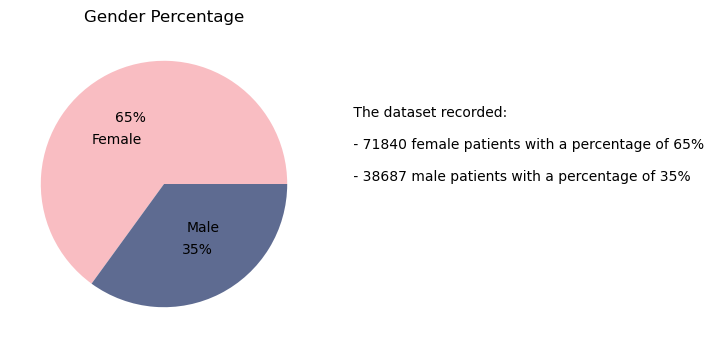

In [600]:
x=df['gender'].value_counts()
label = 'Female','Male'
text = ''' The dataset recorded:\n\n - 71840 female patients with a percentage of 65%\n
 - 38687 male patients with a percentage of 35%'''
plt.subplots(figsize = (4,4))
plt.pie(x, labels=label, colors= ['#f9bdc2','#5e6b91'], autopct='%1.0f%%',labeldistance=.4 )
plt.title('Gender Percentage')
plt.text(1.5,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

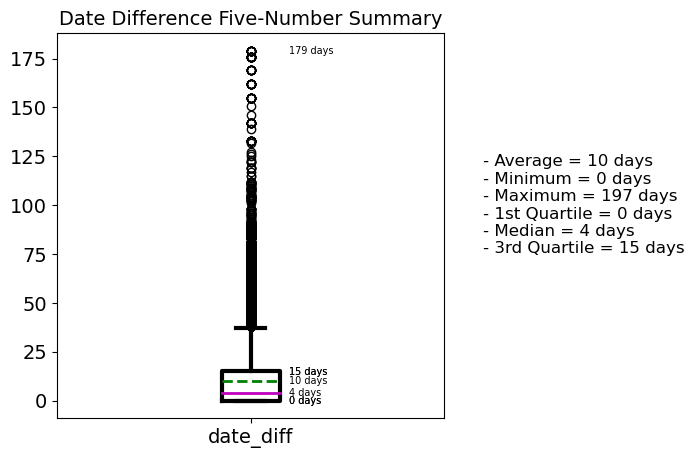

In [602]:
# Exploring the date_diff:
x= df.date_diff
notes= '- Average = 10 days\n- Minimum = 0 days\n- Maximum = 197 days\n- 1st Quartile = 0 days\n- Median = 4 days\n- 3rd Quartile = 15 days'
plt.subplots(figsize = (5,5))
plt.boxplot( x,showmeans = True, meanline  = True,showcaps = True,medianprops={ "color" : "m","linewidth": 2},
            boxprops={"color":"black","linewidth": 3},whiskerprops={"color": "black", "linewidth": 3},
            capprops={"color": "black", "linewidth": 3},meanprops = {"color": "green","linewidth": 2 })
for i, v in enumerate(time_stats.iloc[1:,1]):
  plt.text(1.1,v, f'{v:.0f} days', ha='left', va='center',fontsize=7)
plt.title('Date Difference Five-Number Summary', fontsize = 14)
plt.xticks([1],['date_diff'], fontsize = 14)
plt.yticks(fontsize = 14)
plt.text(1.6,100,notes,ha='left',va='center',fontsize = 12, weight = 'normal');

In [604]:
# Exploring age_stages column:
# Category Count:
age_stage_count=df.age_stages.value_counts().reset_index().rename(columns={"index":"age_stages","age_stages":"count"})
age_stage_count.sort_values('count').style.hide()


age_stages,count
teenage,12264
elderly,13301
child,21037
adult,27383
middle_aged,36542


In [606]:
# Calculating age averages of each category:
avg_age=df.groupby('age_stages').age.mean().reset_index().rename(columns={'age':'avg_age'})
avg_age.sort_values('avg_age').style.hide()

age_stages,avg_age
child,4.969055
teenage,17.253262
adult,31.277325
middle_aged,52.899048
elderly,74.708067


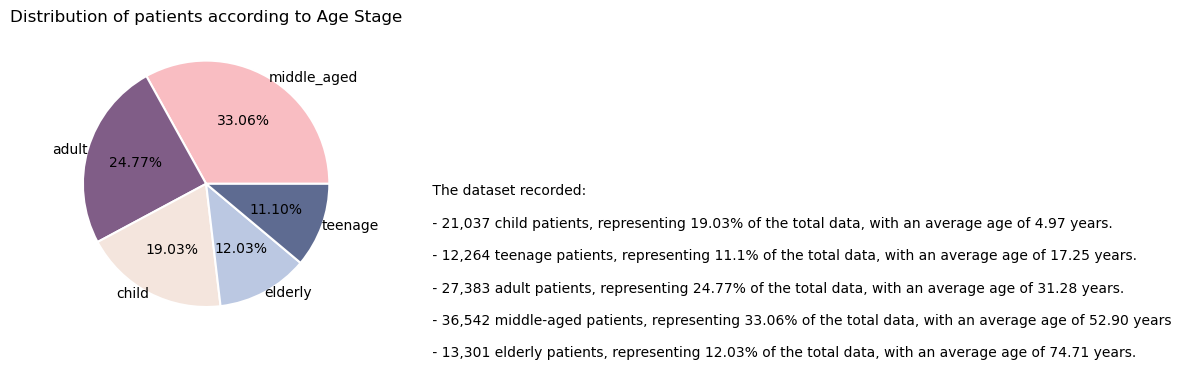

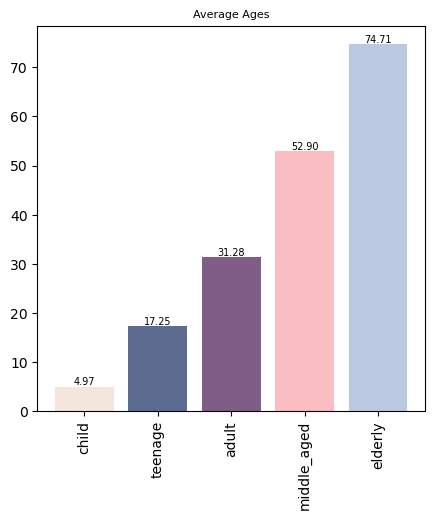

In [608]:
x=df.age_stages.value_counts()
notes = ''' The dataset recorded:\n\n - 21,037 child patients, representing 19.03% of the total data, with an average age of 4.97 years.\n
 - 12,264 teenage patients, representing 11.1% of the total data, with an average age of 17.25 years.\n
 - 27,383 adult patients, representing 24.77% of the total data, with an average age of 31.28 years.\n
 - 36,542 middle-aged patients, representing 33.06% of the total data, with an average age of 52.90 years\n
 - 13,301 elderly patients, representing 12.03% of the total data, with an average age of 74.71 years.\n'''
plt.subplots(figsize = (4,4))
plt.pie(x,labels = age_stage_count.age_stages,  colors= ['#f9bdc2','#805d87','#f4e5dd','#bbc8e2','#5e6b91'], autopct='%1.2f%%',labeldistance=1,pctdistance=.6,
        wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )
plt.title('Distribution of patients according to Age Stage')
plt.text(1.8,0,notes,ha='left',va='top',fontsize = 10, weight = 'normal')
plt.show();

x=avg_age.sort_values('avg_age').age_stages.to_list()
y=avg_age.sort_values('avg_age').avg_age.to_list()
plt.subplots(figsize = (5,5))
plt.bar(x,y,color= ['#f4e5dd','#5e6b91','#805d87','#f9bdc2','#bbc8e2'], alpha = 1)
for i, v in enumerate(avg_age.sort_values('avg_age').avg_age):
  plt.text(i,v, f"{v:.2f}", ha='center', va='bottom',fontsize=7);
plt.title('Average Ages', fontsize = 8);
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10)
plt.show();


In [640]:
count_stages_gender=df.groupby(['age_stages','gender']).age.count().reset_index().rename(columns={'age':'count'})
count_stages_gender.sort_values('age_stages').style.hide()


age_stages,gender,count
adult,F,19663
adult,M,7720
child,F,10023
child,M,11014
elderly,F,8927
elderly,M,4374
middle_aged,F,25015
middle_aged,M,11527
teenage,F,8212
teenage,M,4052


In [642]:
avg_age_gender=df.groupby(['age_stages','gender']).age.mean().reset_index().rename(columns={'age':'average_age'})
avg_age_gender.sort_values('average_age').style.hide()

age_stages,gender,average_age
child,F,4.946224
child,M,4.989831
teenage,M,16.697187
teenage,F,17.527642
adult,F,31.124701
adult,M,31.666062
middle_aged,F,52.813392
middle_aged,M,53.084931
elderly,M,74.574989
elderly,F,74.773272


In [650]:
stage=avg_age_gender.sort_values('average_age').age_stages.unique().tolist()
width=.45
x=np.arange(len(stage))
stage

['child', 'teenage', 'adult', 'middle_aged', 'elderly']

In [ ]:
year = df.year.unique().tolist()  
width=.45
x=np.arange(len(prop_low_year))
locations = x + width / 2
text = '''This chart shows that:
\n- The Proportions  of Total Number of Recorded Rates/Year of rates >= 90%
   is more than the Proportions of Total Number of Recorded Rates/Year
   of rates < 90% for the Female Literacy Rates.
      \n- The difference between each proportion in each year is high
   except in 2006.'''
plt.subplots(figsize = (10,10));
plt.title('The Proportions of Total Number of Recorded Female Literacy Rates / Year', fontsize = 14);
plt.bar(x,prop_low_year,width,color='#E9967A', alpha= 1, label= "<90%")
plt.bar(x + width,prop_high_year,width,color='#CD5C5C', alpha= 1, label= ">=90%")
plt.xticks(locations, year,fontsize = 12, rotation = 90)
plt.yticks(np.arange(0,1,.05),fontsize = 12)
plt.text(21,.5,text,ha='left',va='center',fontsize = 16, weight = 'normal')
plt.legend(fontsize=14)
plt.show();